In [1]:
import os

# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
!wget -q "https://downloads.apache.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz" > /dev/null
!tar -xvf spark-3.1.1-bin-hadoop2.7.tgz
!pip install -q findspark

os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

# Install spark-nlp and pyspark
! pip install spark-nlp==3.0.0 pyspark==3.1.1

# Quick SparkSession start
import sparknlp
spark = sparknlp.start()

print("Spark NLP version")
sparknlp.version()
print("Apache Spark version")
spark.version

spark-3.1.1-bin-hadoop2.7/
spark-3.1.1-bin-hadoop2.7/NOTICE
spark-3.1.1-bin-hadoop2.7/kubernetes/
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/python_executable_check.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/autoscale.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/decommissioning.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/decommissioning_cleanup.py
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/decom.sh
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.1.1-bin-hadoop2.7/kubernetes/docker

'3.1.1'

In [2]:
import pandas as pd
import numpy as np
import json
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from sparknlp.annotator import *
from sparknlp.base import *
import sparknlp
from sparknlp.pretrained import PretrainedPipeline

spark = sparknlp.start()

sparknlp.version()

spark.version

'3.1.1'

In [9]:
import elasticsearch
from elasticsearch import Elasticsearch,helpers

import os
import sys
import pandas as pd
import json
from ast import literal_eval

import datetime
import numpy as np
import requests
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
#import twitter_credentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
pip install elasticsearch

SyntaxError: ignored

In [7]:
pip install twitter

     |████████████████████████████████| 61kB 3.0MB/s 


In [12]:
ENDPOINT="https://big-data-news-analysis.es.us-central1.gcp.cloud.es.io:9243"
es = Elasticsearch(timeout=600,hosts=ENDPOINT,http_auth=('elastic', '5gHGxn73bhwEAMzGY0f7USsy'))
es.ping()

True

In [11]:
!curl ipecho.net/plain

35.201.225.46

In [16]:
result = es.search(index='tweets', body={}, size=99)
print(result["hits"]["hits"]) 

[{'_index': 'tweets', '_type': '_doc', '_id': '1384930454638403587', '_score': 1.0, '_source': {'id': 1384930454638403587, 'created_at': 'Wed Apr 21 18:02:05 +0000 2021', 'text': 'What the fuck??? 🤬🤬🤬'}}, {'_index': 'tweets', '_type': '_doc', '_id': '1384930454743265280', '_score': 1.0, '_source': {'id': 1384930454743265280, 'created_at': 'Wed Apr 21 18:02:05 +0000 2021', 'text': '@Dale82539275 @ArgoJournal @TheEconomist @YouGovAmerica I think you’re doing a really bad job of trying to convince people to take the vaccine this way'}}, {'_index': 'tweets', '_type': '_doc', '_id': '1384930454751653891', '_score': 1.0, '_source': {'id': 1384930454751653891, 'created_at': 'Wed Apr 21 18:02:05 +0000 2021', 'text': "🇺🇲 US : Free Vaccine\n🇬🇧 UK : Free Vaccine\n🇮🇱 Israel : Free Vaccine\n🇯🇵 Japan : Free Vaccine\n🇨🇳 China : Free Vaccine\n\n🇮🇳 India is mostly the only country in the world asking it's citizens to pay for COVID Vaccine. Vishwaguru?"}}, {'_index': 'tweets', '_type': '_doc', '_id': '1

In [19]:
print ("putting documents in a list")
elastic_docs = result["hits"]["hits"]

"""
GET ALL OF THE ELASTICSEARCH
INDEX'S FIELDS FROM _SOURCE
"""
#  create an empty Pandas DataFrame object for docs
docs = pd.DataFrame()

# iterate each Elasticsearch doc in list
print ("\ncreating objects from Elasticsearch data.")
for num, doc in enumerate(elastic_docs):

    # get _source data dict from document
    source_data = doc["_source"]

    # get _id from document
    _id = doc["_id"]

    # create a Series object from doc dict object
    doc_data = pd.Series(source_data, name = _id)

    # append the Series object to the DataFrame object
    docs = docs.append(doc_data)

putting documents in a list

creating objects from Elasticsearch data.


In [20]:
docs

,created_at,id,text
1384930454638403587,Wed Apr 21 18:02:05 +0000 2021,1.384930e+18,What the fuck??? 🤬🤬🤬
1384930454743265280,Wed Apr 21 18:02:05 +0000 2021,1.384930e+18,@Dale82539275 @ArgoJournal @TheEconomist @YouG...
1384930454751653891,Wed Apr 21 18:02:05 +0000 2021,1.384930e+18,🇺🇲 US : Free Vaccine\n🇬🇧 UK : Free Vaccine\n🇮🇱...
1384930454831308806,Wed Apr 21 18:02:05 +0000 2021,1.384930e+18,🙄🙄🙄🙄 @nasa @Space_Station @spaceforcedod @stat...
1384930455053537282,Wed Apr 21 18:02:05 +0000 2021,1.384930e+18,BREAKING: The Gamaleya Center: Russia’s MOH an...
...,...,...,...
1384930466512375808,Wed Apr 21 18:02:08 +0000 2021,1.384930e+18,Gov. Kristi Noem issued an executive order Tue...
1384930466814386176,Wed Apr 21 18:02:08 +0000 2021,1.384930e+18,'You were claiming that it was the Scottish Go...
1384930466814472195,Wed Apr 21 18:02:08 +0000 2021,1.384930e+18,I HAD MY SECOND SHOT. I TAKE A BLOOD THINNER D...
1384930466810183680,Wed Apr 21 18:02:08 +0000 2021,1.384930e+18,I’M THIRTY FUCKING SEVEN YEARS OLD\n\nhttps://...


In [21]:
from google.colab import files
uploaded = files.upload()

Saving testing_data_biden_immigration_policy.json to testing_data_biden_immigration_policy.json


In [22]:
df = pd.read_json ('testing_data_biden_immigration_policy.json',lines=True)

In [23]:
df.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,timestamp_ms,display_text_range,extended_tweet,possibly_sensitive,extended_entities
0,2021-04-12 21:51:38+00:00,1381726732168929282,1381726732168929280,RT @FirstGentleman: Yall are always asking the...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 102200239, 'id_str': '102200239', 'name...",NaN,NaN,None,NaN,{'created_at': 'Mon Apr 12 21:36:33 +0000 2021...,1.381722e+18,1.381722e+18,{'created_at': 'Mon Apr 12 21:32:23 +0000 2021...,"{'url': 'https://t.co/0h7WjNM8b0', 'expanded':...",True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-04-12 21:51:38.847,NaN,NaN,NaN,NaN
1,2021-04-12 21:51:39+00:00,1381726733112639488,1381726733112639488,@Lboogie123L @MatthewJamesS19 @NPR @BrianKempG...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.381680e+18,1.381680e+18,3.950176e+09,3.950176e+09,Lboogie123L,"{'id': 35822974, 'id_str': '35822974', 'name':...",NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,2021-04-12 21:51:39.072,"[48, 140]",{'full_text': '@Lboogie123L @MatthewJamesS19 @...,NaN,NaN
2,2021-04-12 21:51:39+00:00,1381726733817233411,1381726733817233408,@Gavskrr Como se a porra do Joe Biden se preoc...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,1.381720e+18,1.381720e+18,1.090011e+18,1.090011e+18,Gavskrr,"{'id': 1376903339271716865, 'id_str': '1376903...",NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,pt,2021-04-12 21:51:39.240,"[9, 99]",NaN,NaN,NaN
3,2021-04-12 21:51:39+00:00,1381726733695557632,1381726733695557632,Confirmation that human trafficking is ramping...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,None,"{'id': 1223192369756962816, 'id_str': '1223192...",NaN,NaN,None,NaN,NaN,1.381698e+18,1.381698e+18,{'created_at': 'Mon Apr 12 19:58:03 +0000 2021...,"{'url': 'https://t.co/BF780afkK4', 'expanded':...",True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-04-12 21:51:39.211,NaN,NaN,NaN,NaN
4,2021-04-12 21:51:39+00:00,1381726733741740039,1381726733741740032,RT @SenAngusKing: President Biden has made str...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 27493883, 'id_str': '27493883', 'name':...",NaN,NaN,None,NaN,{'created_at': 'Mon Apr 12 20:02:04 +0000 2021...,NaN,NaN,NaN,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-04-12 21:51:39.222,NaN,NaN,NaN,NaN


In [ ]:
df['geo'].isnull().sum()

3341

In [ ]:
df['coordinates'].isnull().sum()

768

In [24]:
text_list=df['text'].to_list()

In [25]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")
    
use = UniversalSentenceEncoder.pretrained(name="tfhub_use", lang="en")\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")


sentimentdl = SentimentDLModel.pretrained(name='sentimentdl_use_twitter', lang="en")\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("sentiment")

nlpPipeline = Pipeline(
      stages = [
          documentAssembler,
          use,
          sentimentdl
      ])

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentimentdl_use_twitter download started this may take some time.
Approximate size to download 11.4 MB
[OK!]


In [26]:
empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

df = spark.createDataFrame(pd.DataFrame({"text":text_list}))
result = pipelineModel.transform(df)

In [28]:
light_model = LightPipeline(pipelineModel)
text="Euro 2020 and the Copa America have both been moved to the summer of 2021 due to the coronavirus outbreak."
light_model.annotate(text)['sentiment'][0]


'negative'

In [ ]:

result_df=result.select(F.explode(F.arrays_zip('document.result', 'sentiment.result')).alias("cols")) \
.select(F.expr("cols['0']").alias("document"),
        F.expr("cols['1']").alias("sentiment")).toPandas()

In [ ]:
result_df

,document,sentiment
0,RT @FirstGentleman: Yall are always asking the...,positive
1,@Lboogie123L @MatthewJamesS19 @NPR @BrianKempG...,positive
2,@Gavskrr Como se a porra do Joe Biden se preoc...,negative
3,Confirmation that human trafficking is ramping...,positive
4,RT @SenAngusKing: President Biden has made str...,positive
...,...,...
3336,RT @UmaruSanda: The #Dumsor situation isn't fu...,negative
3337,RT @PoliticusSarah: Jen Psaki hits Sen. John C...,negative
3338,"""The President remains committed to his pledge...",positive
3339,RT @RickChapterTwo: So a president behaving as...,positive


In [ ]:
df_orig= pd.read_json ('testing_data_biden_immigration_policy.json',lines=True)
result_df.rename(columns = {'document' : 'text', 'sentiment' : 'sentiment'}, inplace = True)
df_clean=pd.merge(df_orig, result_df, on="text")

In [ ]:
df_clean

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,timestamp_ms,display_text_range,extended_tweet,possibly_sensitive,extended_entities,sentiment
0,2021-04-12 21:51:38+00:00,1381726732168929282,1381726732168929280,RT @FirstGentleman: Yall are always asking the...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 102200239, 'id_str': '102200239', 'name...",NaN,NaN,None,NaN,{'created_at': 'Mon Apr 12 21:36:33 +0000 2021...,1.381722e+18,1.381722e+18,{'created_at': 'Mon Apr 12 21:32:23 +0000 2021...,"{'url': 'https://t.co/0h7WjNM8b0', 'expanded':...",True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-04-12 21:51:38.847,NaN,NaN,NaN,NaN,positive
1,2021-04-12 21:51:38+00:00,1381726732168929282,1381726732168929280,RT @FirstGentleman: Yall are always asking the...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 102200239, 'id_str': '102200239', 'name...",NaN,NaN,None,NaN,{'created_at': 'Mon Apr 12 21:36:33 +0000 2021...,1.381722e+18,1.381722e+18,{'created_at': 'Mon Apr 12 21:32:23 +0000 2021...,"{'url': 'https://t.co/0h7WjNM8b0', 'expanded':...",True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-04-12 21:51:38.847,NaN,NaN,NaN,NaN,positive
2,2021-04-12 21:51:38+00:00,1381726732168929282,1381726732168929280,RT @FirstGentleman: Yall are always asking the...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 102200239, 'id_str': '102200239', 'name...",NaN,NaN,None,NaN,{'created_at': 'Mon Apr 12 21:36:33 +0000 2021...,1.381722e+18,1.381722e+18,{'created_at': 'Mon Apr 12 21:32:23 +0000 2021...,"{'url': 'https://t.co/0h7WjNM8b0', 'expanded':...",True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-04-12 21:51:38.847,NaN,NaN,NaN,NaN,positive
3,2021-04-12 21:51:38+00:00,1381726732168929282,1381726732168929280,RT @FirstGentleman: Yall are always asking the...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 102200239, 'id_str': '102200239', 'name...",NaN,NaN,None,NaN,{'created_at': 'Mon Apr 12 21:36:33 +0000 2021...,1.381722e+18,1.381722e+18,{'created_at': 'Mon Apr 12 21:32:23 +0000 2021...,"{'url': 'https://t.co/0h7WjNM8b0', 'expanded':...",True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-04-12 21:51:38.847,NaN,NaN,NaN,NaN,positive
4,2021-04-12 21:51:38+00:00,1381726732168929282,1381726732168929280,RT @FirstGentleman: Yall are always asking the...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 102200239, 'id_str': '102200239', 'name...",NaN,NaN,None,NaN,{'created_at': 'Mon Apr 12 21:36:33 +0000 2021...,1.381722e+18,1.381722e+18,{'created_at': 'Mon Apr 12 21:32:23 +0000 2021...,"{'url': 'https://t.co/0h7WjNM8b0', 'expanded':...",True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-04-12 21:51:38.847,NaN,NaN,NaN,NaN,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23708,2021-04-12 21:55:39+00:00,1381727742308278275,1381727742308278272,@RepMattGaetz Another guilty person doing his ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.381663e+18,1.381663e+18,8.189486e+17,8.189486e+17,RepMattGaetz,"{'id': 92211478, 'id_str': '92211478', 'name':...",NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,2021-04-12 21:55:39.683,"[14,

In [ ]:
import matplotlib.pyplot as plt
import altair as alt
df_clean['created_at'] = pd.to_datetime(df_clean['created_at'])

In [ ]:
df_clean

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,timestamp_ms,display_text_range,extended_tweet,possibly_sensitive,extended_entities,sentiment
0,2021-04-12 21:51:38+00:00,1381726732168929282,1381726732168929280,RT @FirstGentleman: Yall are always asking the...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 102200239, 'id_str': '102200239', 'name...",NaN,NaN,None,NaN,{'created_at': 'Mon Apr 12 21:36:33 +0000 2021...,1.381722e+18,1.381722e+18,{'created_at': 'Mon Apr 12 21:32:23 +0000 2021...,"{'url': 'https://t.co/0h7WjNM8b0', 'expanded':...",True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-04-12 21:51:38.847,NaN,NaN,NaN,NaN,positive
1,2021-04-12 21:51:38+00:00,1381726732168929282,1381726732168929280,RT @FirstGentleman: Yall are always asking the...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 102200239, 'id_str': '102200239', 'name...",NaN,NaN,None,NaN,{'created_at': 'Mon Apr 12 21:36:33 +0000 2021...,1.381722e+18,1.381722e+18,{'created_at': 'Mon Apr 12 21:32:23 +0000 2021...,"{'url': 'https://t.co/0h7WjNM8b0', 'expanded':...",True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-04-12 21:51:38.847,NaN,NaN,NaN,NaN,positive
2,2021-04-12 21:51:38+00:00,1381726732168929282,1381726732168929280,RT @FirstGentleman: Yall are always asking the...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 102200239, 'id_str': '102200239', 'name...",NaN,NaN,None,NaN,{'created_at': 'Mon Apr 12 21:36:33 +0000 2021...,1.381722e+18,1.381722e+18,{'created_at': 'Mon Apr 12 21:32:23 +0000 2021...,"{'url': 'https://t.co/0h7WjNM8b0', 'expanded':...",True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-04-12 21:51:38.847,NaN,NaN,NaN,NaN,positive
3,2021-04-12 21:51:38+00:00,1381726732168929282,1381726732168929280,RT @FirstGentleman: Yall are always asking the...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 102200239, 'id_str': '102200239', 'name...",NaN,NaN,None,NaN,{'created_at': 'Mon Apr 12 21:36:33 +0000 2021...,1.381722e+18,1.381722e+18,{'created_at': 'Mon Apr 12 21:32:23 +0000 2021...,"{'url': 'https://t.co/0h7WjNM8b0', 'expanded':...",True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-04-12 21:51:38.847,NaN,NaN,NaN,NaN,positive
4,2021-04-12 21:51:38+00:00,1381726732168929282,1381726732168929280,RT @FirstGentleman: Yall are always asking the...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 102200239, 'id_str': '102200239', 'name...",NaN,NaN,None,NaN,{'created_at': 'Mon Apr 12 21:36:33 +0000 2021...,1.381722e+18,1.381722e+18,{'created_at': 'Mon Apr 12 21:32:23 +0000 2021...,"{'url': 'https://t.co/0h7WjNM8b0', 'expanded':...",True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-04-12 21:51:38.847,NaN,NaN,NaN,NaN,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23708,2021-04-12 21:55:39+00:00,1381727742308278275,1381727742308278272,@RepMattGaetz Another guilty person doing his ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.381663e+18,1.381663e+18,8.189486e+17,8.189486e+17,RepMattGaetz,"{'id': 92211478, 'id_str': '92211478', 'name':...",NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,2021-04-12 21:55:39.683,"[14,

Text(0, 0.5, 'frequency')

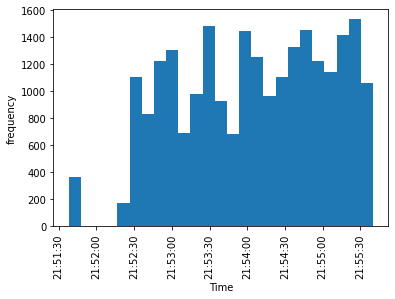

In [ ]:
import plotly.express as px
plt.hist(df_clean['created_at'],bins=25)
plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
plt.xlabel('Time')
plt.ylabel('frequency')

In [ ]:
import plotly.express as px
fig=px.histogram(df_clean,x='created_at',color='sentiment')
fig.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

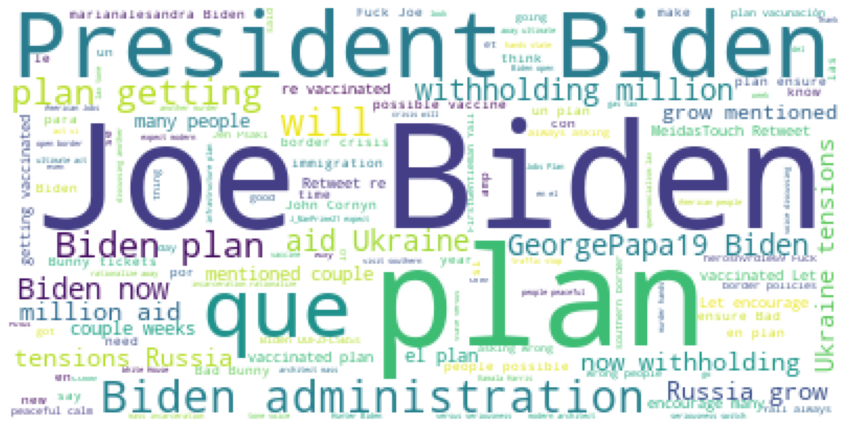

In [ ]:
text_string=" ".join(str(x) for x in text_list)
stopwords=set(STOPWORDS)
stopwords.update(['https','CO','RT','la','de'])
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text_string)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
import nltk
from nltk.collocations import *
tokens=text_string.split()

In [ ]:
bigram_measures=nltk.collocations.BigramAssocMeasures()
finder=BigramCollocationFinder.from_words(tokens)
finder.apply_freq_filter(3)
print (finder.nbest(bigram_measures.pmi,100))

[('"root', 'causes"'), ('5.800', 'millones'), ('@ChildCareON:', 'Premier'), ('@DevlinBarrett:', 'New:'), ('@EricDJuly:', 'Hahahahahahahahahah.'), ('@FelixSalMac', 'cambió'), ('@GRIERBOLUDO:', 'ir'), ('@LiisaJust', '@cbrnetaskforce'), ('@MagaSooner', '@LiisaJust'), ('@ScherieMurray:', 'Currently'), ('@SoyAjenjo:', 'Registrando'), ('@StratCons:', 'Verdaderamente'), ('@TheGrayRider', '@jdontom'), ('@cbrnetaskforce', '@TheGrayRider'), ('@ckitty33forkag', '@francklyspoken…'), ('@eljoraka:', 'Periodistas'), ('@jdontom', '@ckitty33forkag'), ('@marklevinshow', 'https://t.co/ZebZe4C6wj'), ('@medicinemadden:', 'saio'), ('@ronaldrios:', 'Vamos'), ('@sza:', 'Excellence'), ("ALEC's", 'secret'), ('Americans...', 'Send'), ('Argentine', 'journalist'), ('Bucks', 'unmasked:'), ('By', '"studying"'), ('Concerning', '‘Abuse'), ('Dana', 'Loesch'), ('Federalize', 'Suburban'), ('Grist', 'https://t.co/587rv5WOGH'), ('Harris,', 'RIcardo'), ('Hong', 'Kong'), ('Hotels', 'https://t.co/dRZJR2Pu2T'), ('Jack', 'https